In [1]:
import rioxarray
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geogif 
from IPython.display import Image 
import pystac_client 
from rasterio.enums import Resampling 
import rioxarray 
import shapely 
import stackstac

In [2]:
points = gpd.read_file("C:/Users/leoni/Documents/Uni/UGS/example_data/training_data.shp")
AOI = gpd.read_file("C:/Users/leoni/Documents/Uni/UGS/example_data/clip_area.shp")

crs_code = AOI.crs.to_string()

In [3]:
api_url = 'https://earth-search.aws.element84.com/v1'
client = pystac_client.Client.open(api_url)
for collection in client.get_collections():
    print(collection)

<CollectionClient id=sentinel-2-c1-l2a-preview>
<CollectionClient id=cop-dem-glo-30>
<CollectionClient id=naip>
<CollectionClient id=sentinel-2-l2a>
<CollectionClient id=sentinel-2-l1c>
<CollectionClient id=cop-dem-glo-90>
<CollectionClient id=sentinel-1-grd>
<CollectionClient id=landsat-c2-l2>


In [4]:
collection = 'sentinel-2-l2a'

lon = 10.9
lat = 48.3

datetime = '2022-05-01/2022-09-01'
point = shapely.Point(lon, lat)

In [5]:
search = client.search(
    collections=[collection],
    intersects=point,
    datetime=datetime,
    query=["eo:cloud_cover<10", "s2:vegetation_percentage>70"],
)

In [6]:
items = search.item_collection()
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df

,geometry,created,platform,constellation,instruments,eo:cloud_cover,proj:epsg,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,...,s2:granule_id,s2:mgrs_tile,s2:reflectance_conversion_factor,datetime,s2:sequence,earthsearch:s3_path,earthsearch:payload_id,earthsearch:boa_offset_applied,processing:software,updated
0,"POLYGON ((10.96506 48.73625, 11.85242 48.71769...",2022-11-05T22:58:13.395Z,sentinel-2b,sentinel-2,[msi],0.029720,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220811T162101_A0283...,32UPU,0.972541,2022-08-11T10:17:33.717000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/1b1c...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T22:58:13.395Z
1,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-05T19:45:09.079Z,sentinel-2a,sentinel-2,[msi],0.039180,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220809T180703_A0372...,32UPU,0.971958,2022-08-09T10:27:38.886000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/2000...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T19:45:09.079Z
2,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:27:16.119Z,sentinel-2b,sentinel-2,[msi],0.019446,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220804T130854_A0282...,NaN,0.970637,2022-08-04T10:27:31.640000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/e580...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:27:16.119Z
3,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:28:17.495Z,sentinel-2b,sentinel-2,[msi],0.097777,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220725T132135_A0281...,NaN,0.968647,2022-07-25T10:27:32.176000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/758e...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:28:17.495Z
4,"POLYGON ((10.95772 48.73637, 11.85242 48.71769...",2022-11-06T14:04:50.606Z,sentinel-2b,sentinel-2,[msi],0.730002,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220722T130911_A0280...,NaN,0.968224,2022-07-22T10:17:35.155000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/feaa...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T14:04:50.606Z
5,"POLYGON ((10.95174 48.73647, 11.85242 48.71769...",2022-11-06T13:26:15.478Z,sentinel-2b,sentinel-2,[msi],0.051958,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220702T130622_A0277...,NaN,0.967556,2022-07-02T10:17:35.298000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/11a4...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:26:15.478Z
6,"POLYGON ((10.94658 48.73656, 11.85242 48.71769...",2022-11-06T13:26:13.879Z,sentinel-2a,sentinel-2,[msi],0.012398,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220627T162810_A0366...,NaN,0.967975,2022-06-27T10:17:42.879000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/6474...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:26:13.879Z
7,"POLYGON ((10.95487 48.73642, 11.85242 48.71769...",2022-11-05T22:35:48.262Z,sentinel-2b,sentinel-2,[msi],3.358487,32632,32,U,PU,...,S2B_OPER_MSI_L2A_TL_2BPS_20220612T132443_A0275...,32UPU,0.970604,2022-06-12T10:17:32.982000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/b11b...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T22:35:48.262Z
8,"POLYGON ((10.96533 48.73624, 11.85242 48.71769...",2022-11-05T19:44:35.655Z,sentinel-2a,sentinel-2,[msi],9.590572,32632,32,U,PU,...,S2A_OPER_MSI_L2A_TL_ATOS_20220518T162816_A0360...,32UPU,0.979135,2022-05-18T10:17:35.738000Z,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/100e...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T19:44:35.655Z


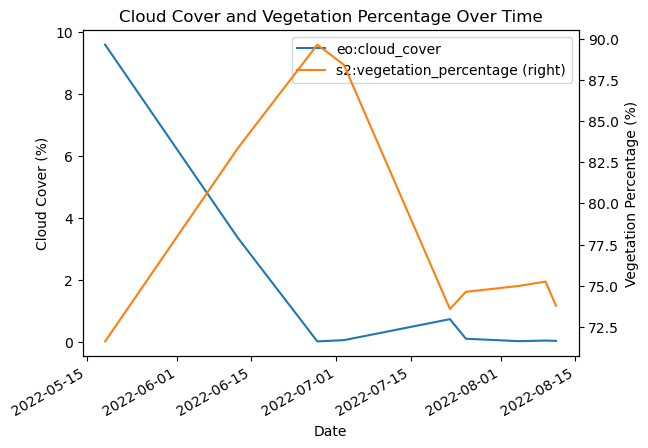

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

df.sort_index(inplace=True)

ax = df['eo:cloud_cover'].plot(label='eo:cloud_cover', legend=True)
df['s2:vegetation_percentage'].plot(ax=ax, secondary_y=True, label='s2:vegetation_percentage', legend=True)

ax.set_title('Cloud Cover and Vegetation Percentage Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Cloud Cover (%)')
ax.right_ax.set_ylabel('Vegetation Percentage (%)')

plt.show()

In [8]:
df_filt = df.loc[(df['eo:cloud_cover'] <= 2) & (df['s2:nodata_pixel_percentage'] <= 10)]
df_filt

,geometry,created,platform,constellation,instruments,eo:cloud_cover,proj:epsg,mgrs:utm_zone,mgrs:latitude_band,mgrs:grid_square,...,s2:datastrip_id,s2:granule_id,s2:mgrs_tile,s2:reflectance_conversion_factor,s2:sequence,earthsearch:s3_path,earthsearch:payload_id,earthsearch:boa_offset_applied,processing:software,updated
datetime,,,,,,,,,,,,,,,,,,,,,
2022-07-25 10:27:32.176000+00:00,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:28:17.495Z,sentinel-2b,sentinel-2,[msi],0.097777,32632,32,U,PU,...,S2B_OPER_MSI_L2A_DS_2BPS_20220725T132135_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220725T132135_A0281...,NaN,0.968647,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/758e...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:28:17.495Z
2022-08-04 10:27:31.640000+00:00,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-06T13:27:16.119Z,sentinel-2b,sentinel-2,[msi],0.019446,32632,32,U,PU,...,S2B_OPER_MSI_L2A_DS_2BPS_20220804T130854_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20220804T130854_A0282...,NaN,0.970637,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/e580...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-06T13:27:16.119Z
2022-08-09 10:27:38.886000+00:00,"POLYGON ((10.36029 48.74497, 11.85242 48.71769...",2022-11-05T19:45:09.079Z,sentinel-2a,sentinel-2,[msi],0.039180,32632,32,U,PU,...,S2A_OPER_MSI_L2A_DS_ATOS_20220809T180703_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20220809T180703_A0372...,32UPU,0.971958,0,s3://sentinel-cogs/sentinel-s2-l2a-cogs/32/U/P...,roda-sentinel2/workflow-sentinel2-to-stac/2000...,True,{'sentinel2-to-stac': '0.1.0'},2022-11-05T19:45:09.079Z


In [9]:
footprint = gpd.read_file("augsburg_boundary.geojson")
footprint.total_bounds

array([10.80162048, 48.25485552, 10.98976135, 48.44560024])

In [10]:
cube = stackstac.stack(
    items,
    resolution=100,
    bounds_latlon=footprint.total_bounds,
    resampling=Resampling.bilinear
)
cube

C:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\stackstac\prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-8f81f84ce027f83fed57e6945afa8cbd' (time: 9,
                                                                band: 32,
                                                                y: 217, x: 145)>
dask.array<fetch_raster_window, shape=(9, 32, 217, 145), dtype=float64, chunksize=(1, 1, 217, 145), chunktype=numpy.ndarray>
Coordinates: (12/53)
  * time                                     (time) datetime64[ns] 2022-05-18...
    id                                       (time) <U24 'S2A_32UPU_20220518_...
  * band                                     (band) <U12 'aot' ... 'wvp-jp2'
  * x                                        (x) float64 6.332e+05 ... 6.476e+05
  * y                                        (y) float64 5.368e+06 ... 5.346e+06
    mgrs:utm_zone                            int32 32
    ...                                       ...
    title                                    (band) <U31 'Aerosol optical thi...
    gsd                                      (band) object None 10 ... None None
    common_name                              (band) object None 'blue' ... None
    center_wavelength                        (band) object None 0.49 ... None
    full_width_half_max                      (band) object None 0.098 ... None
    epsg                                     int32 32632
Attributes:
    spec:        RasterSpec(epsg=32632, bounds=(633200, 5346100, 647700, 5367...
    crs:         epsg:32632
    transform:   | 100.00, 0.00, 633200.00|\n| 0.00,-100.00, 5367800.00|\n| 0...
    resolution:  100

In [29]:
ndvi = (cube.sel(band='nir') - cube.sel(band='red')) / (cube.sel(band='nir') + cube.sel(band='red'))

ndwi = (cube.sel(band='green') - cube.sel(band='nir')) / (cube.sel(band='green') + cube.sel(band='nir'))

# Alternatively, NDWI calculation using NIR and SWIR22 bands
# ndwi = (cube.sel(band='nir') - cube.sel(band='swir22')) / (cube.sel(band='nir') + cube.sel(band='swir22'))
ndvi

<xarray.DataArray 'stackstac-f1f7b469f7e7243ebeb570beb62baef0' (time: 9,
                                                                y: 217, x: 145)>
dask.array<truediv, shape=(9, 217, 145), dtype=float64, chunksize=(1, 217, 145), chunktype=numpy.ndarray>
Coordinates: (12/48)
  * time                                     (time) datetime64[ns] 2022-05-18...
    id                                       (time) <U24 'S2A_32UPU_20220518_...
  * x                                        (x) float64 6.332e+05 ... 6.476e+05
  * y                                        (y) float64 5.368e+06 ... 5.346e+06
    mgrs:grid_square                         <U2 'PU'
    constellation                            <U10 'sentinel-2'
    ...                                       ...
    s2:saturated_defective_pixel_percentage  int32 0
    s2:high_proba_clouds_percentage          (time) float64 0.1806 ... 0.000596
    mgrs:latitude_band                       <U1 'U'
    raster:bands                             object [{'nodata': 0, 'data_type...
    gsd                                      object 10
    epsg                                     int32 32632

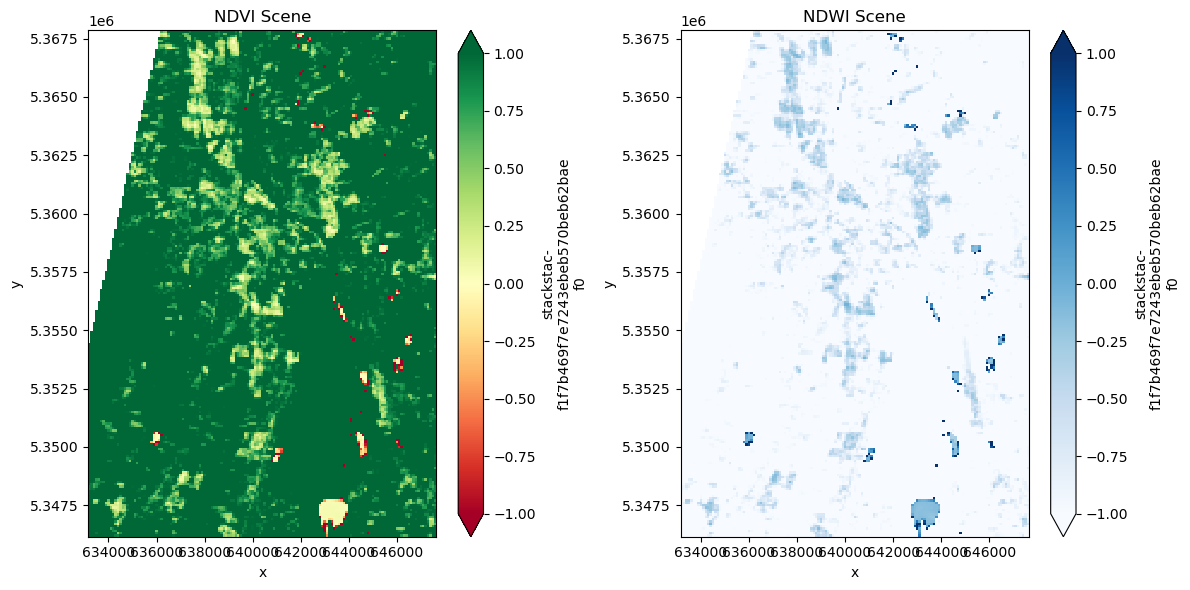

In [32]:
first_ndvi_scene = ndvi.isel(time=3)
first_ndwi_scene = ndwi.isel(time=3)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

first_ndvi_scene.plot(ax=ax[0], cmap='RdYlGn', vmin=-1, vmax=1)
ax[0].set_title('NDVI Scene')

first_ndwi_scene.plot(ax=ax[1], cmap='Blues', vmin=-1, vmax=1)
ax[1].set_title('NDWI Scene')

plt.tight_layout()
plt.show()

In [43]:
cube.groupby("time").mean

<bound method DataArrayGroupByAggregations.mean of DataArrayGroupBy, grouped over 'time'
9 groups with labels 2022-05-18T10:17:35.738000, ....>

In [5]:
# Additional raster layers
b2 = rioxarray.open_rasterio("example_data/T32UPU_20210814T102031_B02_10m_extent.tif").rio.reproject("EPSG:25832")
b3 = rioxarray.open_rasterio("example_data/T32UPU_20210814T102031_B03_10m_extent.tif").rio.reproject("EPSG:25832")
b4 = rioxarray.open_rasterio("example_data/T32UPU_20210814T102031_B04_10m_extent.tif").rio.reproject("EPSG:25832")
b8 = rioxarray.open_rasterio("example_data/T32UPU_20210814T102031_B08_10m_extent.tif").rio.reproject("EPSG:25832")

In [6]:
# Crop and mask the rasters
b2_clip = b2.rio.clip(AOI.geometry)
b3_clip = b3.rio.clip(AOI.geometry)
b4_clip = b4.rio.clip(AOI.geometry)
b8_clip = b8.rio.clip(AOI.geometry)

In [7]:
# Calculate NDVI and NDWI
ndvi = (b8_clip - b4_clip) / (b8_clip + b4_clip)
ndwi = (b3_clip - b8_clip) / (b3_clip + b8_clip)

In [14]:
ndvi_path = "path_ndvi.tif"
ndwi_path = "path_ndwi.tif"
ndvi.rio.to_raster(ndvi_path)
ndwi.rio.to_raster(ndwi_path)

In [15]:
from rasterstats import point_query

# Function to extract raster values at point locations using rasterstats
def extract_raster_values(raster_path, points, band=1):
    # Extract values
    values = point_query(points, raster_path, band=band)
    return pd.DataFrame({raster_path: values})

# Paths to your raster files
b2_path = "example_data/T32UPU_20210814T102031_B02_10m_extent.tif"
b3_path = "example_data/T32UPU_20210814T102031_B03_10m_extent.tif"
b4_path = "example_data/T32UPU_20210814T102031_B04_10m_extent.tif"
b8_path = "example_data/T32UPU_20210814T102031_B08_10m_extent.tif"

# Applying the function to each raster file path
b2_values = extract_raster_values(b2_path, points)
b3_values = extract_raster_values(b3_path, points)
b4_values = extract_raster_values(b4_path, points)
b8_values = extract_raster_values(b8_path, points)

# Assuming ndvi and ndwi are calculated and saved as raster files
ndvi_path = "path_ndvi.tif"
ndwi_path = "path_ndwi.tif"
ndvi_values = extract_raster_values(ndvi_path, points)
ndwi_values = extract_raster_values(ndwi_path, points)

# Combine the extracted values into one DataFrame
extracted_values = pd.concat([b2_values, b3_values, b4_values, b8_values, ndvi_values, ndwi_values], axis=1)

C:\Users\leoni\Programme\Miniconda\envs\geo\Lib\site-packages\rasterstats\io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


<Axes: >

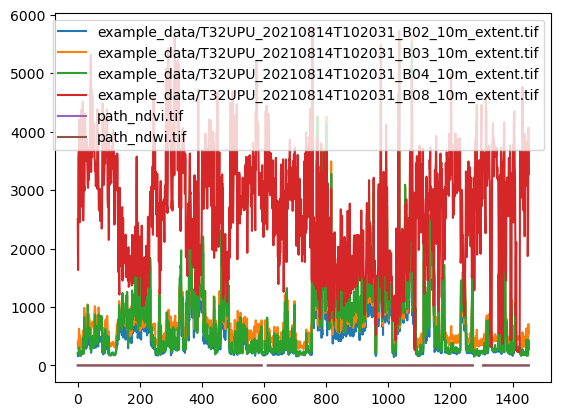

In [17]:
extracted_values.plot()

In [39]:
extracted_values

,b2,b3,b4,b8,ndvi,ndwi,class
0,197.024507,396.696159,215.753135,2503.357655,0.842053,-0.726041,1
1,156.983526,281.737592,223.518066,1632.427338,0.745514,-0.697579,1
2,200.265477,437.329221,202.131516,3568.373923,0.892665,-0.780789,1
3,186.211496,440.454569,204.129375,3655.807181,0.893846,-0.783538,1
4,233.493112,628.315270,303.826116,3728.948089,0.849108,-0.711401,1
...,...,...,...,...,...,...,...
1448,192.599560,382.287290,192.193491,3706.531867,0.901151,-0.812492,1
1449,215.864610,339.101470,207.218052,1871.859162,0.800661,-0.693118,1
1450,186.678479,298.462384,170.147678,2387.350029,0.865956,-0.776620,1
1451,346.817654,708.258162,438.575460,4068.885569,0.804126,-0.702526,0


In [24]:
df = extracted_values

df.columns = ["b2", "b3", "b4", "b8", "ndvi", "ndwi"]

df['class'] = points['class']

df.fillna(0, inplace=True)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=123)

In [26]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Make predictions and evaluate the model
predictions = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)

In [31]:
conf_matrix

array([[154,  12],
       [ 12, 102]], dtype=int64)

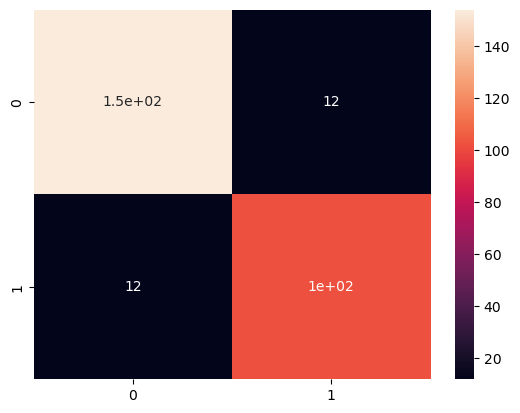

In [28]:
# Plotting confusion matrix
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [32]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions))

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       166
           1       0.89      0.89      0.89       114

    accuracy                           0.91       280
   macro avg       0.91      0.91      0.91       280
weighted avg       0.91      0.91      0.91       280

Accuracy: 0.91


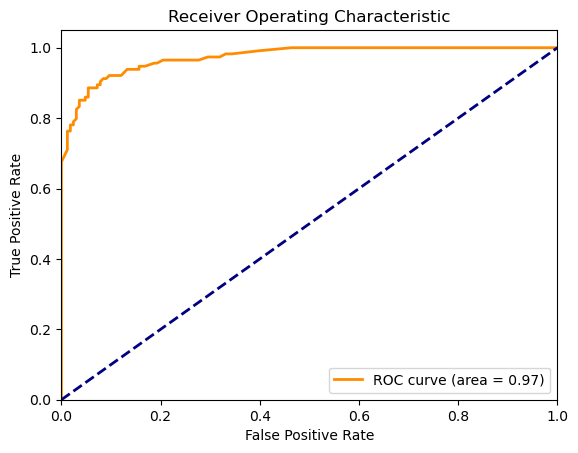

In [34]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

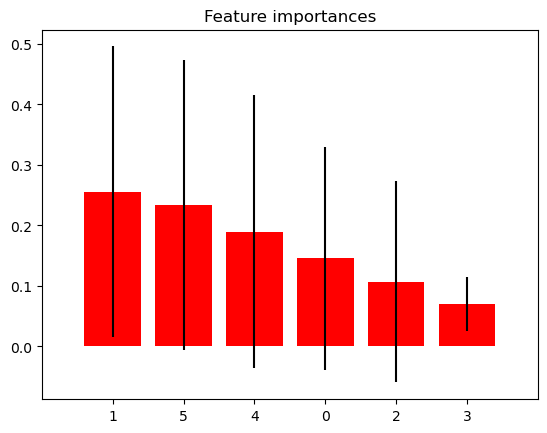

In [37]:
# Feature importances
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [42]:
print(points['class'].unique())
print(points['class'].value_counts())

[1 0]
class
0    827
1    626
Name: count, dtype: int64
